CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-15., 15.), fill=1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
from utils import get_mnist_data

train_data, test_data = get_mnist_data(train_transforms, test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

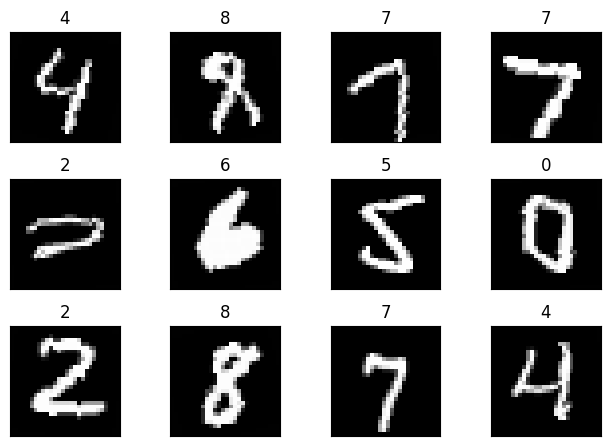

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [7]:
from model import model_1

CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [9]:
from utils import train, test
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model_1().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
         MaxPool2d-7          [-1, 128, 11, 11]               0
            Conv2d-8           [-1, 32, 11, 11]           4,096
              ReLU-9           [-1, 32, 11, 11]               0
           Conv2d-10             [-1, 64, 9, 9]          18,432
             ReLU-11             [-1, 64, 9, 9]               0
           Conv2d-12            [-1, 128, 7, 7]          73,728
             ReLU-13            [-1, 128, 7, 7]               0
           Conv2d-14             [-1, 1

CODE BLOCK: 10

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_1().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 1


Loss=2.3016669750213623 Batch_id=117 Accuracy=19.00: 100%|███████████████████████████| 118/118 [03:10<00:00,  1.61s/it]



Test set: Average loss: 2.3020, Accuracy: 1192/10000 (11.92%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 2


Loss=0.28266721963882446 Batch_id=117 Accuracy=58.62: 100%|██████████████████████████| 118/118 [03:10<00:00,  1.62s/it]



Test set: Average loss: 0.4595, Accuracy: 8760/10000 (87.60%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 3


Loss=0.21789030730724335 Batch_id=117 Accuracy=91.75: 100%|██████████████████████████| 118/118 [03:06<00:00,  1.58s/it]



Test set: Average loss: 0.1911, Accuracy: 9390/10000 (93.90%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 4


Loss=0.06738763302564621 Batch_id=117 Accuracy=94.80: 100%|██████████████████████████| 118/118 [03:07<00:00,  1.59s/it]



Test set: Average loss: 0.1022, Accuracy: 9688/10000 (96.88%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 5


Loss=0.12444431334733963 Batch_id=117 Accuracy=95.98: 100%|██████████████████████████| 118/118 [02:58<00:00,  1.51s/it]



Test set: Average loss: 0.0947, Accuracy: 9713/10000 (97.13%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 6


Loss=0.16835467517375946 Batch_id=117 Accuracy=96.57: 100%|██████████████████████████| 118/118 [03:02<00:00,  1.54s/it]



Test set: Average loss: 0.0637, Accuracy: 9805/10000 (98.05%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 7


Loss=0.12503476440906525 Batch_id=117 Accuracy=96.76: 100%|██████████████████████████| 118/118 [03:08<00:00,  1.60s/it]



Test set: Average loss: 0.0747, Accuracy: 9791/10000 (97.91%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 8


Loss=0.09784948080778122 Batch_id=117 Accuracy=97.17: 100%|██████████████████████████| 118/118 [02:52<00:00,  1.46s/it]



Test set: Average loss: 0.0778, Accuracy: 9768/10000 (97.68%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 9


Loss=0.16380496323108673 Batch_id=117 Accuracy=97.20: 100%|██████████████████████████| 118/118 [03:12<00:00,  1.63s/it]



Test set: Average loss: 0.0572, Accuracy: 9815/10000 (98.15%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 10


Loss=0.04344947636127472 Batch_id=117 Accuracy=97.46: 100%|██████████████████████████| 118/118 [03:23<00:00,  1.72s/it]



Test set: Average loss: 0.0569, Accuracy: 9834/10000 (98.34%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 11


Loss=0.03689924627542496 Batch_id=117 Accuracy=98.13: 100%|██████████████████████████| 118/118 [03:21<00:00,  1.71s/it]



Test set: Average loss: 0.0428, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 12


Loss=0.013655241578817368 Batch_id=117 Accuracy=98.29: 100%|█████████████████████████| 118/118 [03:11<00:00,  1.62s/it]



Test set: Average loss: 0.0411, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 13


Loss=0.007946922443807125 Batch_id=117 Accuracy=98.28: 100%|█████████████████████████| 118/118 [03:05<00:00,  1.57s/it]



Test set: Average loss: 0.0406, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 14


Loss=0.08714646100997925 Batch_id=117 Accuracy=98.35: 100%|██████████████████████████| 118/118 [03:07<00:00,  1.59s/it]



Test set: Average loss: 0.0401, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 15


Loss=0.08051323145627975 Batch_id=117 Accuracy=98.38: 100%|██████████████████████████| 118/118 [02:59<00:00,  1.52s/it]



Test set: Average loss: 0.0390, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 8.0000e-03.


CODE BLOCK: 11